In [1]:
import torch
from torch_geometric.loader import DataLoader

from settings import *
from generator import generate_organism
from visualizer import Visualizer
from enums import EnvironmentType, ModelType
from food_env import *

In [2]:
scale = 4
wall_amount = 100*scale
food_amount = 500*scale
centered_env = Centered_Env(food_amount=food_amount, wall_amount=wall_amount//4)
cluster_env = Cluster_Env(clusters=30*scale, cluster_size=30, wall_amount=wall_amount//2)
circle_env = Circle_Env(circles=2*scale, food_amount=food_amount*2, wall_amount=wall_amount*2)
spiral_env = Spiral_Env(spirals=3, food_amount=food_amount, wall_amount=wall_amount)
bottleneck_env = Bottleneck_Env(food_amount=food_amount//3, wall_amount=(wall_amount*16)//25)

In [3]:
train_config = Train_Config(stdev=0.1, popsize=10, 
    name='hidden20_localOnly', problem_searcher=ProblemSearcher.CMAES,
    with_samplepool=False, timesteps=1000)

In [4]:
settings = Settings(
    device = torch.device('cpu'),
    batch_size = 2,
    cells = 100,
    #food_envs=[centered_env, cluster_env, circle_env, spiral_env],
    food_envs=[spiral_env, cluster_env, circle_env, spiral_env],
    scale = scale,
    wrap_around = False,
    
    model_type = ModelType.Local,
    #model_type = ModelType.WithGlobalNode,
    #model_type = ModelType.SmallWorld,

    radius = 0.04,
    radius_food_scale = 5,
    consume_radius_scale = 1, 
    noise = 0.001,
    energy_required_to_replicate = 50,
    train_config=train_config,
    max_degree = 10,
    #TODO add new max degree on cells

    radius_wall_scale = 5,
    #radius_wall_damage_scale = 2,
    radius_wall_damage_scale = 3,
    wall_damage = 20,
    radius_long_scale=2,
)

In [5]:
graphs = [generate_organism(settings).toGraph(bottleneck_env) for _ in range(settings.batch_size)]
loader = DataLoader(graphs, batch_size=settings.batch_size)
graph = next(iter(loader))
visualizer = Visualizer(settings)

/Users/martinholst/Desktop/MultiCellularAutomata/Thesis/src/generator.py:139: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  walls[0:8*scale, :2] = torch.tensor([x, bottom_walls_y], device=device).transpose(0, 1)


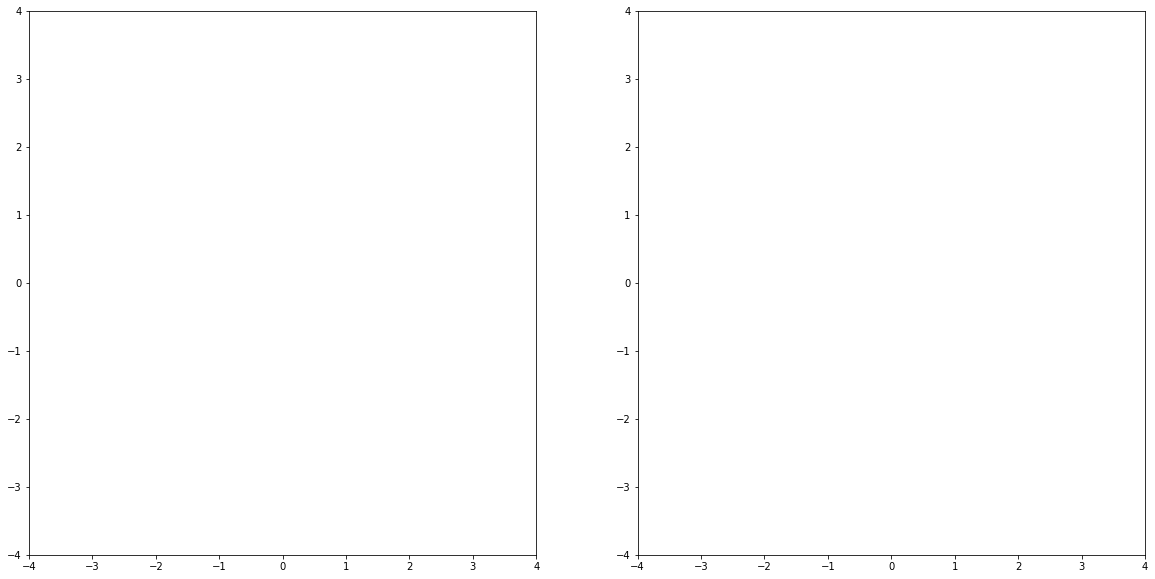

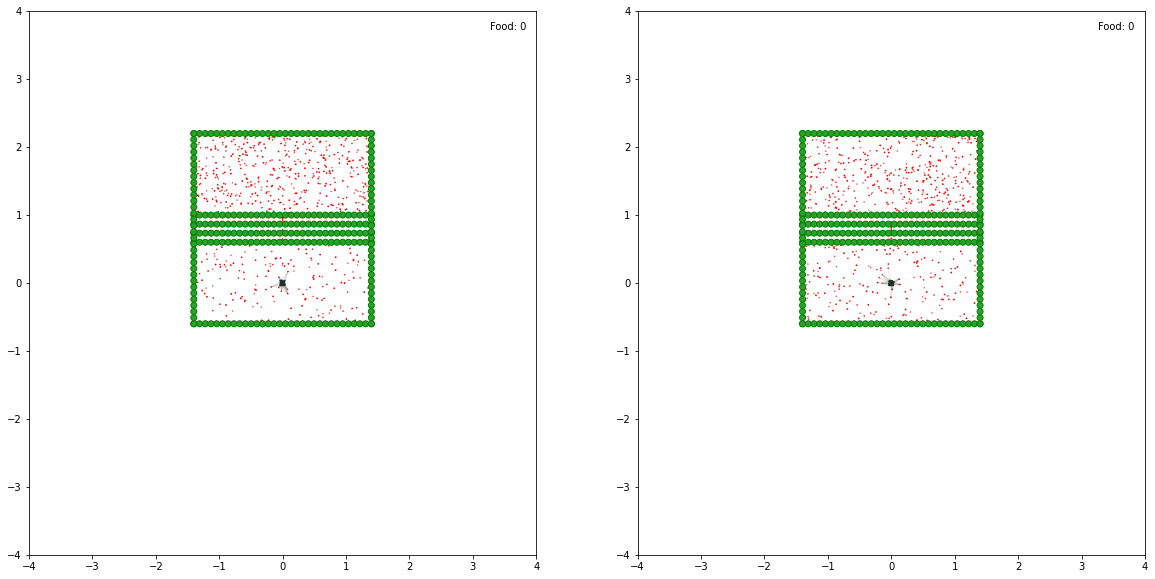

In [6]:
visualizer.plot_organism(graph)
visualizer.figure

### Show graph and graph and as euclidean space

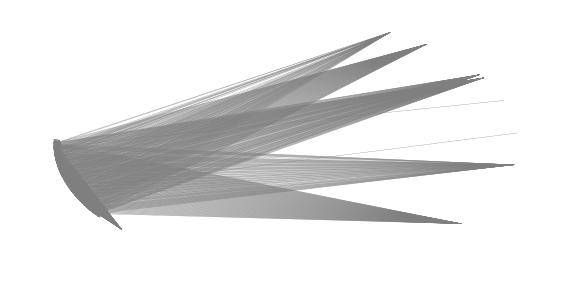

In [7]:
visualizer.plot_graph(graph)

### Visualize the hidden parameters of the cells in the graph

In [8]:
#get model and env
#run model and at each time step visualize the 5 hidden parameters 